Importing python packages required for Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #provides data structures to quickly analyze data
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()

Importing the Hypothyroid CSV file

In [2]:
dataset = pd.read_csv("hypothyroid.csv")

The **.columns** function will help us understand what colums are present in the dataset

In [3]:
dataset.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

## Data Statistics
> 
In this section we will understand the key features of the data ranging from the size of the dataset to what types of variables are present,this helps us manage outliers and missing values



1) Shape 


> This function returns the size of the dataframe in rows and columns



In [4]:
#size of dataframe in use (rows,columns)
print(dataset.shape)

(3772, 30)


2) Datatypes


> This function returns the datatypes of all attributes present in the dataset



In [5]:
#datatypes of all the attributes
print(dataset.dtypes)

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

3) Description


>As the name suggest the describe function provides description of the dataset,as we can see above the attributes in this dataset are categorical values hence the .describe() function provides information like count,unique,top and frequency of attributes,as opposed to mean,standard deviation etc appearing when the attributes are numerical values  



In [6]:
dataset.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


The .info function gives the user number of non null values and datatypes present in the dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Even though the data set seemingly has no missing values,one will find that in place of numpy nan it consists of "?" displaying missing values

Therefore in order to find the number of missing values in the dataset we count the number of "?" present in each column

In [8]:
#columns that contain ? with their counts
for column in dataset.columns:
    count = dataset[column][dataset[column]=='?'].count()
    if count!=0:
        print(column, dataset[column][dataset[column]=='?'].count())
    

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


# 2.) Missing Values


> In this section we will be managing missing values



We can see that for the column 'TBG' all values are missing. Hence we shall drop this column as it is of no use to us.

In [9]:
dataset = dataset.drop(['TBG'],axis =1)

Given that there exist columns which contain only true or false values indicating whether the next column has a value or a "?",we will drop such columns as we will handle such values later 

In [10]:
dataset = dataset.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

We now replace all "?" values with NumPy NAN

In [11]:
#replacing '?' with numpy nan
dataset.replace('?', np.nan, inplace=True)

To verify if all "?" values have been converted to NumPy NAN we now count the number of values

In [12]:
#checking whether all the '?' values were replaced correctly 
for column in dataset.columns:
    count = dataset[column][dataset[column]=='?'].count()
    if count==0:
        print(column, dataset[column][dataset[column]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


Now that we have converted all the "?" values into NAN let us count the number of NAN values in each column

In [13]:
dataset.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Converting categorical attributes to numerical before using imputation techniques.

We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them.


> Why?  Given that there are only two categories the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. Hence we will have to drop one of the columns,which is why we shall use mapping for such columns. For columns with more than two categories we will make use of get dummies.


 





In [14]:
#mapping categorical values in column:sex
dataset['sex'] = dataset['sex'].map({'M' : 0, 'F' : 1})

In [15]:
#other columns have two categorical values t and f. Hence mapping them at once
for column in dataset.columns:
    if  len(dataset[column].unique())==2:
        dataset[column] = dataset[column].map({'f' : 0, 't' : 1})

In [16]:
#checking unique values in referal_source column
dataset['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [17]:
#using get dummies to encode
dataset = pd.get_dummies(dataset, columns=['referral_source'])

In [18]:
#converting age into numeric form
dataset['age'] = dataset['age'].apply(pd.to_numeric)

We will now map the unique values of the output column **Class** using the Label Encoder

In [19]:
#checking unique values in Output class column
dataset['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

A Label Encoder is used to convert labels into numeric form i.e. machine readable form,in this case the label encoder converts:


1.   negative to 0
2.   compensated_hypothyroid to 1
3.   primary_hypothyroid to 2
4.   secondary_hypothyroid to 3





In [20]:
#encoding
lbEn = LabelEncoder()

dataset['Class'] =lbEn.fit_transform(dataset['Class'])

In [21]:
dataset.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,1.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,0,0,0,1,0
5,18.0,1.0,1,0,0,0,0,0,0,0,...,NaN,183,1.3,141,1,0,0,0,0,1
6,59.0,1.0,0,0,0,0,0,0,0,0,...,NaN,72,0.92,78,1,0,0,0,0,1
7,80.0,1.0,0,0,0,0,0,0,0,0,...,0.6,80,0.7,115,1,0,0,0,1,0
8,66.0,1.0,0,0,0,0,0,0,0,0,...,2.2,123,0.93,132,1,0,0,0,1,0
9,68.0,0.0,0,0,0,0,0,0,0,0,...,1.6,83,0.89,93,1,0,0,0,1,0


Now that we have converted all categorical values into numerical values when we use the .describe() function we are provided with the mean, standard deviation, min,max values etc

In [22]:
print(dataset.describe(include='all'))

                age          sex  on_thyroxine  query_on_thyroxine  \
count   3771.000000  3622.000000   3772.000000         3772.000000   
unique          NaN          NaN           NaN                 NaN   
top             NaN          NaN           NaN                 NaN   
freq            NaN          NaN           NaN                 NaN   
mean      51.735879     0.684705      0.123012            0.013256   
std       20.084958     0.464698      0.328494            0.114382   
min        1.000000     0.000000      0.000000            0.000000   
25%       36.000000     0.000000      0.000000            0.000000   
50%       54.000000     1.000000      0.000000            0.000000   
75%       67.000000     1.000000      0.000000            0.000000   
max      455.000000     1.000000      1.000000            1.000000   

        on_antithyroid_medication         sick     pregnant  thyroid_surgery  \
count                 3772.000000  3772.000000  3772.000000      3772.000000   

Now that we have encoded categorical values we shall now impute missing values using KNN

> K-Nearest Neighbours (kNN) identifies the neighboring points through a measure of distance,the missing values are then estimated using completed values of neighboring observations.



In [23]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(dataset)
new_dataset=pd.DataFrame(data=np.round(new_array), columns=dataset.columns)

In [24]:
#checking if nan values were replaced
new_dataset.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,125.0,1.0,109.0,1.0,0.0,1.0,0.0,0.0,0.0
1,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,102.0,1.0,108.0,1.0,0.0,0.0,0.0,0.0,1.0
2,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,109.0,1.0,120.0,1.0,0.0,0.0,0.0,0.0,1.0
3,70.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,175.0,1.0,177.0,1.0,0.0,0.0,0.0,0.0,1.0
4,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,61.0,1.0,70.0,1.0,0.0,0.0,0.0,1.0,0.0
5,18.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,183.0,1.0,141.0,1.0,0.0,0.0,0.0,0.0,1.0
6,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,72.0,1.0,78.0,1.0,0.0,0.0,0.0,0.0,1.0
7,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,80.0,1.0,115.0,1.0,0.0,0.0,0.0,1.0,0.0
8,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,123.0,1.0,132.0,1.0,0.0,0.0,0.0,1.0,0.0
9,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,83.0,1.0,93.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
new_dataset

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,125.0,1.0,109.0,1.0,0.0,1.0,0.0,0.0,0.0
1,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,102.0,1.0,108.0,1.0,0.0,0.0,0.0,0.0,1.0
2,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,109.0,1.0,120.0,1.0,0.0,0.0,0.0,0.0,1.0
3,70.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,175.0,1.0,177.0,1.0,0.0,0.0,0.0,0.0,1.0
4,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,61.0,1.0,70.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,131.0,1.0,117.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,68.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,124.0,1.0,114.0,1.0,0.0,0.0,0.0,1.0,0.0
3769,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,112.0,1.0,105.0,1.0,0.0,0.0,0.0,0.0,1.0
3770,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,82.0,1.0,87.0,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
new_dataset.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

In [27]:
new_dataset.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.692471,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.027306,108.459438,1.020944,110.301166,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.785068,34.838114,0.165546,32.145618,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3.) Data Visualization


> In this section we will visualize our data to check for outliers,skewness and to see if the classes are uniformly distributed




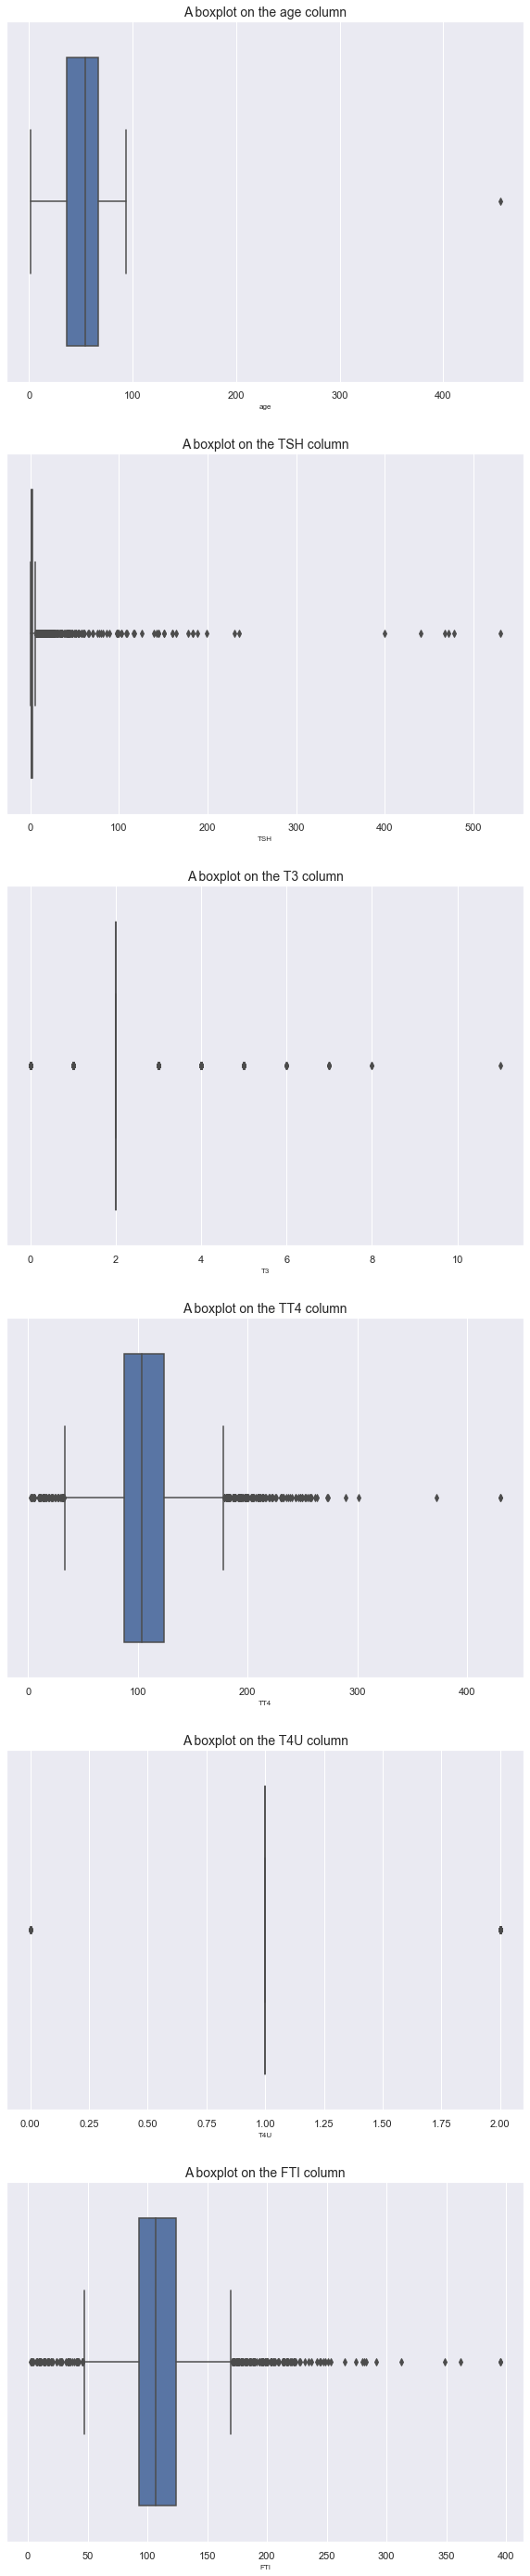

In [28]:
#outliers boxplot
col_names = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
fig, ax = plot.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = new_dataset[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plot.show()

In [29]:
#ouliers count
dataset1= new_dataset[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]
Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3 - Q1
((dataset1 < (Q1 - 1.5 * IQR)) | (dataset1> (Q3 + 1.5 * IQR))).sum()

age       1
TSH     373
T3     1231
TT4     193
T4U     105
FTI     222
dtype: int64

Age has one outlier. Hence we drop the row. Other outliers cannot be dropped as that might affect the model due to higher number

In [30]:
index_names=new_dataset[new_dataset['age']>=100].index
new_dataset.drop(index_names, inplace=True)

In [31]:
#check if outlier was dropped
dataset1= new_dataset[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]
Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3 - Q1
((dataset1 < (Q1 - 1.5 * IQR)) | (dataset1> (Q3 + 1.5 * IQR))).sum()

age       0
TSH     373
T3     1231
TT4     193
T4U     105
FTI     222
dtype: int64

We shall now check the distribution of continuous data in dataset


The graphs for age, TSH and T3 looks heavely skewed towards left.Hence we will need to do some transformations to the data and see if it improves the plot.

Before performing a log transformation , let's add 1 to each value in the column to handle exception when we try to find log of '0'.

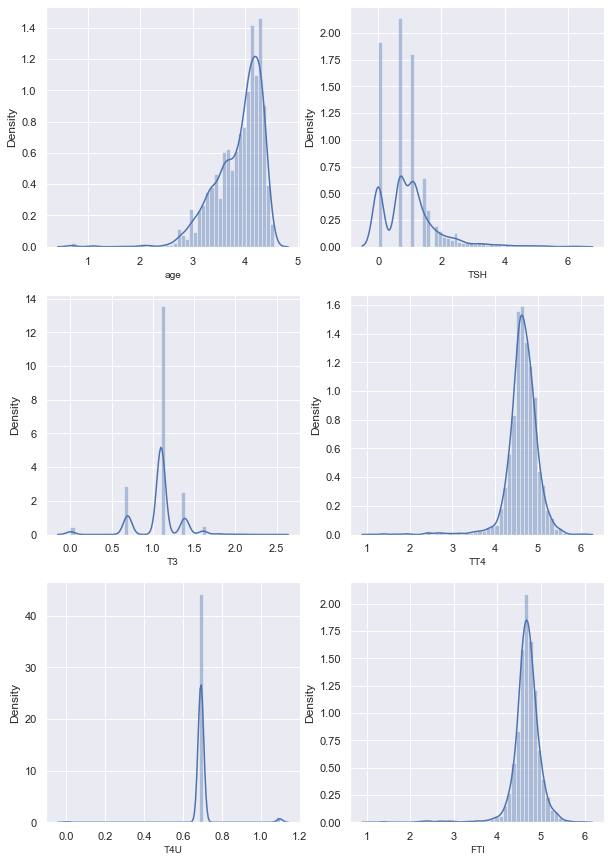

In [32]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_dataset[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_dataset[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()


After log transformation, rest of the columns look fine however 'TSH' has a weird trend.

It won't give much of information so let's drop this column.

In [33]:
new_dataset = new_dataset.drop(['TSH'],axis=1)

We shall now check if output class is uniformly distributed

In [34]:
new_dataset.groupby('Class').size() #array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid', 'secondary_hypothyroid'], dtype=object)

Class
0.0     194
1.0    3480
2.0      95
3.0       2
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

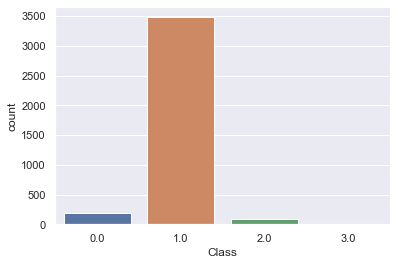

In [35]:
sns.countplot(new_dataset['Class'])

We can clearly see that the dataset is highly imbalanced.

Inoder to fix this we make use of a python library known as imbalanced-learn to deal with imbalanced data.From imbalanced learn we will be using the RandomOverSampler.


> The bias in a training dataset can influence machine learning algorithms, leading some to ignore the minority class entirely.One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.
We shall be performing oversampling



In [36]:
x = new_dataset.drop(['Class'],axis=1)
y = new_dataset['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [37]:
x_sampled.shape

(13920, 25)

In [38]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [39]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13916,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13917,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13918,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0


In [40]:
y_sampled

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13915    3.0
13916    3.0
13917    3.0
13918    3.0
13919    3.0
Name: Class, Length: 13920, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

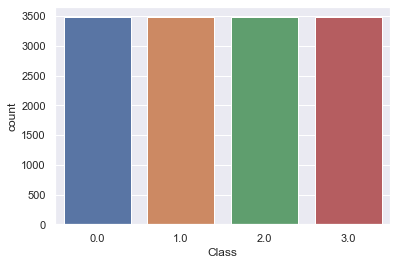

In [41]:
sns.countplot(y_sampled)

Our dataset looks balanced now. We can go ahead with training our model on this data.

Splitting dataset into train and test set

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled,train_size=0.8,random_state=1)

Categorical Naive Bayes

In [43]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB().fit(X_train, y_train)
cnb_predictions = cnb.predict(X_test)
accuracy = cnb.score(X_test, y_test)
print(accuracy)

0.9019396551724138


A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect. 
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of the trained classification model.

>Precision is defined as the ratio of true positives to the sum of true and false positives.
>Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
>The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
>Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [44]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: \n\n",confusion_matrix(y_test, cnb_predictions))
from sklearn.metrics import classification_report
print("\n Classification Report:\n",classification_report(y_test, cnb_predictions))

Confusion Matrix: 

 [[598  95   0   0]
 [163 513   9   1]
 [  5   0 690   0]
 [  0   0   0 710]]

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       693
         1.0       0.84      0.75      0.79       686
         2.0       0.99      0.99      0.99       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.90      2784
   macro avg       0.90      0.90      0.90      2784
weighted avg       0.90      0.90      0.90      2784



Decision Tree

In [45]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
for i in range(1,36):
    dtree = tree.DecisionTreeClassifier(random_state=0,max_depth=i)
    dtree=dtree.fit(X_train,y_train)
    y_pred=dtree.predict(X_test)
    print("Accuracy for {}:",i,metrics.accuracy_score(y_test, y_pred))  

Accuracy for {}: 1 0.5025143678160919
Accuracy for {}: 2 0.7783764367816092
Accuracy for {}: 3 0.8239942528735632
Accuracy for {}: 4 0.8394396551724138
Accuracy for {}: 5 0.8588362068965517
Accuracy for {}: 6 0.860632183908046
Accuracy for {}: 7 0.8588362068965517
Accuracy for {}: 8 0.8584770114942529
Accuracy for {}: 9 0.8602729885057471
Accuracy for {}: 10 0.8983477011494253
Accuracy for {}: 11 0.913433908045977
Accuracy for {}: 12 0.9069683908045977
Accuracy for {}: 13 0.9281609195402298
Accuracy for {}: 14 0.9396551724137931
Accuracy for {}: 15 0.9457614942528736
Accuracy for {}: 16 0.951867816091954
Accuracy for {}: 17 0.9594109195402298
Accuracy for {}: 18 0.9608477011494253
Accuracy for {}: 19 0.9694683908045977
Accuracy for {}: 20 0.9741379310344828
Accuracy for {}: 21 0.9723419540229885
Accuracy for {}: 22 0.9766522988505747
Accuracy for {}: 23 0.978448275862069
Accuracy for {}: 24 0.9773706896551724
Accuracy for {}: 25 0.9773706896551724
Accuracy for {}: 26 0.9788074712643678

In [46]:

dtree = tree.DecisionTreeClassifier(random_state=0,max_depth=36)
dtree=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
#tree.plot_tree(dtree)
#plt.show()

In [47]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9802442528735632


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[693   0   0   0]
 [ 45 631  10   0]
 [  0   0 695   0]
 [  0   0   0 710]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       693
         1.0       1.00      0.92      0.96       686
         2.0       0.99      1.00      0.99       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.98      2784
   macro avg       0.98      0.98      0.98      2784
weighted avg       0.98      0.98      0.98      2784



KNN

Text(0, 0.5, 'Error Rate')

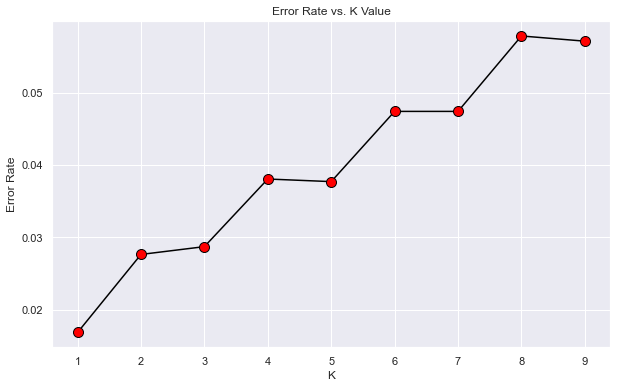

In [49]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='black', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9723419540229885
Confusion Matrix:
 [[693   0   0   0]
 [ 70 609   7   0]
 [  0   0 695   0]
 [  0   0   0 710]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       693
         1.0       1.00      0.89      0.94       686
         2.0       0.99      1.00      0.99       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.97      2784
   macro avg       0.97      0.97      0.97      2784
weighted avg       0.97      0.97      0.97      2784



Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9895833333333334


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[693   0   0   0]
 [ 20 657   9   0]
 [  0   0 695   0]
 [  0   0   0 710]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       693
         1.0       1.00      0.96      0.98       686
         2.0       0.99      1.00      0.99       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.99      2784
   macro avg       0.99      0.99      0.99      2784
weighted avg       0.99      0.99      0.99      2784



SVM

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
svclassifier = svm.SVC(kernel='linear',probability=True,decision_function_shape='ovr')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[477 176  40   0]
 [215 442  29   0]
 [ 14  13 665   3]
 [  0   0   0 710]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.69      0.68       693
         1.0       0.70      0.64      0.67       686
         2.0       0.91      0.96      0.93       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.82      2784
   macro avg       0.82      0.82      0.82      2784
weighted avg       0.82      0.82      0.82      2784

Accuracy: 0.8239942528735632


In [54]:
X_train.shape

(11136, 25)

ANN

In [116]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Initialising the ANN
# Initialising the ANN
model=Sequential()
model.add(Dense(1000,input_dim=25,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size =200 , epochs = 100,verbose=1)

Epoch 1/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8535
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8536
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.8518
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.8539
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8534
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8517
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8509
Epoch 8/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8525
Epoch 9/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8490
Epoch 10/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8523
Epoch 11/

In [117]:
prediction=classifier.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=-1)
predict_label=np.argmax(prediction,axis=-1)

accuracy=np.sum(y_label==predict_label)/length * 100 

print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 16.12787356321839


Ensemble Learning
>Ensemble learning refers to a group (or ensemble) of base learners, or models, which work collectively to achieve a better final prediction. A single model, also known as a base or weak learner, may not perform well individually due to high variance or high bias. However, when weak learners are aggregated, they can form a strong learner, as their combination reduces bias or variance, yielding better model performance.

>Bagging
>>Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these weak models are then trained independently, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. 

In [53]:
from sklearn.ensemble import BaggingClassifier
arr=[dtree,cnb,knn,rt]
for a in arr:
    model = BaggingClassifier(base_estimator=a,n_estimators=10, random_state=1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy for {} :".format(a),metrics.accuracy_score(y_test, y_pred))


Accuracy for DecisionTreeClassifier(max_depth=36, random_state=0) : 0.9849137931034483
Accuracy for CategoricalNB() : 0.9026580459770115
Accuracy for KNeighborsClassifier(metric='euclidean', n_neighbors=2) : 0.9730603448275862
Accuracy for RandomForestClassifier() : 0.9881465517241379


We observe that bagging does not effect the accuracy of our models to a larger extent

>Boosting
>>Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added. 

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
for i in range (100,500,50):
    model= GradientBoostingClassifier(n_estimators=i,random_state=1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy for :",i,metrics.accuracy_score(y_test, y_pred))

Accuracy for : 100 0.9173850574712644
Accuracy for : 150 0.9436063218390804
Accuracy for : 200 0.9533045977011494
Accuracy for : 250 0.9583333333333334
Accuracy for : 300 0.9619252873563219
Accuracy for : 350 0.9651580459770115
Accuracy for : 400 0.9683908045977011
Accuracy for : 450 0.9716235632183908


In [55]:
model= GradientBoostingClassifier(n_estimators=450,random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy for :",i,metrics.accuracy_score(y_test, y_pred))

Accuracy for : 450 0.9716235632183908


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[693   0   0   0]
 [ 68 607  11   0]
 [  0   0 695   0]
 [  0   0   0 710]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       693
         1.0       1.00      0.88      0.94       686
         2.0       0.98      1.00      0.99       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.97      2784
   macro avg       0.97      0.97      0.97      2784
weighted avg       0.97      0.97      0.97      2784



In [57]:
from xgboost import XGBClassifier
for i in range(100,500,50):
    model=XGBClassifier(n_estimators=i,random_state=1,eval_metric='mlogloss').fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy for:",i,metrics.accuracy_score(y_test, y_pred))

Accuracy for: 100 0.9809626436781609
Accuracy for: 150 0.9849137931034483
Accuracy for: 200 0.9849137931034483
Accuracy for: 250 0.9852729885057471
Accuracy for: 300 0.9852729885057471
Accuracy for: 350 0.9859913793103449
Accuracy for: 400 0.9859913793103449
Accuracy for: 450 0.9863505747126436


In [58]:
model=XGBClassifier(n_estimators=400,random_state=1,eval_metric='mlogloss').fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy for:",i,metrics.accuracy_score(y_test, y_pred))

Accuracy for: 450 0.9859913793103449


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[693   0   0   0]
 [ 29 647  10   0]
 [  0   0 695   0]
 [  0   0   0 710]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       693
         1.0       1.00      0.94      0.97       686
         2.0       0.99      1.00      0.99       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.99      2784
   macro avg       0.99      0.99      0.99      2784
weighted avg       0.99      0.99      0.99      2784



In [60]:
from lightgbm import LGBMClassifier
for i in range(100,500,50):
    model=LGBMClassifier(n_estimators=i,random_state=1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy for:",i,metrics.accuracy_score(y_test, y_pred))

Accuracy for: 100 0.9849137931034483
Accuracy for: 150 0.9863505747126436
Accuracy for: 200 0.9888649425287356
Accuracy for: 250 0.9888649425287356
Accuracy for: 300 0.9906609195402298
Accuracy for: 350 0.9899425287356322
Accuracy for: 400 0.9899425287356322
Accuracy for: 450 0.9899425287356322


In [61]:
model=LGBMClassifier(n_estimators=350,random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy for:",metrics.accuracy_score(y_test, y_pred))

Accuracy for: 0.9899425287356322


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[693   0   0   0]
 [ 22 658   6   0]
 [  0   0 695   0]
 [  0   0   0 710]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       693
         1.0       1.00      0.96      0.98       686
         2.0       0.99      1.00      1.00       695
         3.0       1.00      1.00      1.00       710

    accuracy                           0.99      2784
   macro avg       0.99      0.99      0.99      2784
weighted avg       0.99      0.99      0.99      2784



>Stacking
>>Stacking (a.k.a Stack Generalization) is an ensemble technique that uses meta-learning for generating predictions. It can harness the capabilities of well-performing as well as weakly-performing models on a classification or regression task and make predictions with better performance than any other single model in the ensemble.

>>It is an extended form of the Model Averaging Ensemble technique, where multiple sub-models contribute equally or according to their performance weights to a combined prediction. In Stacking, an entirely new model to trained to combine the contributions from each submodel and produce the best predictions. This final model is said to be stacked on top of the others, hence the name.

In [63]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=400,random_state=1,eval_metric='mlogloss')
lgb=LGBMClassifier(n_estimators=350,random_state=1)

In [64]:
from sklearn.model_selection import cross_val_score
clf = [dtc,rfc,knn,xgb,lgb]
for algo in clf:
    score = cross_val_score( algo,X_train,y_train,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of DecisionTreeClassifier() is: 0.9826688374035321
The accuracy score of RandomForestClassifier() is: 0.9911999703330837
The accuracy score of KNeighborsClassifier() is: 0.9472880971978468
The accuracy score of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) is: 0.9871589413102942
The accuracy score of LGBMClassifier(n_e

Level 1 stack

In [65]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
clf = [('xgb',xgb),('rfc',rfc),('knn',knn)]
stack_model = StackingClassifier( estimators = clf,final_estimator = dtc)
score = cross_val_score(stack_model,X_train,y_train,cv = 5,scoring = 'accuracy')
print("The accuracy score is:",score.mean())

The accuracy score is: 0.9999101930848676


Level 2Stack

In [72]:
layer_one_estimators = [('knn', knn),('dtc', dtc)]
layer_two_estimators = [('lgb', lgb),('xgb', xgb)]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=rfc)

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y)
clf.fit(X_train, y_train).score(X_test, y_test)

0.936373276776246